In [1]:
using DifferentialEquations
using ReactionMechanismSimulator
using PyPlot

In [2]:
outdict1 = readinput("chem43_Ag.rms");
outdict2 = readinput("chem43_Cu.rms")


[11:25:07] WARNING: not removing hydrogen atom without neighbors
[11:25:07] WARNING: not removing hydrogen atom without neighbors
┌ Warning: failed to generate StokesDiffusivity model for species vacantX
└ @ ReactionMechanismSimulator /home/ssun30/RMG-electrocat/ReactionMechanismSimulator.jl/src/Parse.jl:352
┌ Warning: failed to generate StokesDiffusivity model for species CO2X
└ @ ReactionMechanismSimulator /home/ssun30/RMG-electrocat/ReactionMechanismSimulator.jl/src/Parse.jl:352
┌ Warning: failed to generate StokesDiffusivity model for species CHO2X
└ @ ReactionMechanismSimulator /home/ssun30/RMG-electrocat/ReactionMechanismSimulator.jl/src/Parse.jl:352
┌ Warning: failed to generate StokesDiffusivity model for species CO2HX
└ @ ReactionMechanismSimulator /home/ssun30/RMG-electrocat/ReactionMechanismSimulator.jl/src/Parse.jl:352
┌ Warning: failed to generate StokesDiffusivity model for species OCX
└ @ ReactionMechanismSimulator /home/ssun30/RMG-electrocat/ReactionMechanismSimulator.j

Dict{Any, Any} with 4 entries:
  "Solvents"              => Solvent[Solvent("water", RiedelViscosity{Float64}(…
  Set(["surface", "gas"]) => Dict{Any, Any}("Reactions"=>ElementaryReaction[vac…
  "gas"                   => Dict{Any, Any}("Species"=>Species[Species{NASA{Emp…
  "surface"               => Dict{Any, Any}("Species"=>Species[Species{NASA{Emp…

In [3]:
liqspcs1 = outdict1["gas"]["Species"];
liqrxns1 = outdict1["gas"]["Reactions"];
surfspcs1 = outdict1["surface"]["Species"];
surfrxns1 = outdict1["surface"]["Reactions"];
interfacerxns1 = outdict1[Set(["surface", "gas"])]["Reactions"];
solv1 = outdict1["Solvents"][1];

In [4]:
liqspcs2 = outdict2["gas"]["Species"];
liqrxns2 = outdict2["gas"]["Reactions"];
surfspcs2 = outdict2["surface"]["Species"];
surfrxns2 = outdict2["surface"]["Reactions"];
interfacerxns2 = outdict2[Set(["surface", "gas"])]["Reactions"];
solv2 = outdict2["Solvents"][1];

In [5]:
sitedensity1 = 2.292e-5; # Ag111
sitedensity2 = 2.943e-5; # Cu111
AVratio = 1.0e5

100000.0

In [6]:
initialcondsliq = Dict(["proton"=>10.0^-4,"CO2"=>10.0^-3*10^3,
        "V"=>1.0,"T"=>298.15,"Phi"=>0.0,"d"=>0.0]);
initialcondssurf1 = Dict(["CO2X"=>0.4*sitedensity1*AVratio,
        "CHO2X"=>0.1*sitedensity1*AVratio,
        "CO2HX"=>0.1*sitedensity1*AVratio,
        "OX"=>0.1*sitedensity1*AVratio,
        "OCX"=>0.1*sitedensity1*AVratio,
        "vacantX"=>0.1*sitedensity1*AVratio,
        "CH2O2X"=>0.05*sitedensity1*AVratio,
        "CHOX"=>0.04*sitedensity1*AVratio,
        "CH2OX"=>0.01*sitedensity1*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-1.5]);
initialcondssurf2 = Dict(["CO2X"=>0.4*sitedensity1*AVratio,
        "CHO2X"=>0.1*sitedensity1*AVratio,
        "CO2HX"=>0.1*sitedensity1*AVratio,
        "OX"=>0.1*sitedensity1*AVratio,
        "OCX"=>0.1*sitedensity1*AVratio,
        "vacantX"=>0.1*sitedensity1*AVratio,
        "CH2O2X"=>0.05*sitedensity1*AVratio,
        "CHOX"=>0.04*sitedensity1*AVratio,
        "CH2OX"=>0.01*sitedensity1*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-1.0]);
initialcondssurf3 = Dict(["CO2X"=>0.4*sitedensity1*AVratio,
        "CHO2X"=>0.1*sitedensity1*AVratio,
        "CO2HX"=>0.1*sitedensity1*AVratio,
        "OX"=>0.1*sitedensity1*AVratio,
        "OCX"=>0.1*sitedensity1*AVratio,
        "vacantX"=>0.1*sitedensity1*AVratio,
        "CH2O2X"=>0.05*sitedensity1*AVratio,
        "CHOX"=>0.04*sitedensity1*AVratio,
        "CH2OX"=>0.01*sitedensity1*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-2.0]);
initialcondssurf4 = Dict(["CO2X"=>0.4*sitedensity2*AVratio,
        "CHO2X"=>0.1*sitedensity2*AVratio,
        "CO2HX"=>0.1*sitedensity2*AVratio,
        "OX"=>0.1*sitedensity2*AVratio,
        "OCX"=>0.1*sitedensity2*AVratio,
        "vacantX"=>0.1*sitedensity2*AVratio,
        "CH2O2X"=>0.05*sitedensity2*AVratio,
        "CHOX"=>0.04*sitedensity2*AVratio,
        "CH2OX"=>0.01*sitedensity2*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-1.5]);
initialcondssurf5 = Dict(["CO2X"=>0.4*sitedensity2*AVratio,
        "CHO2X"=>0.1*sitedensity2*AVratio,
        "CO2HX"=>0.1*sitedensity2*AVratio,
        "OX"=>0.1*sitedensity2*AVratio,
        "OCX"=>0.1*sitedensity2*AVratio,
        "vacantX"=>0.1*sitedensity2*AVratio,
        "CH2O2X"=>0.05*sitedensity2*AVratio,
        "CHOX"=>0.04*sitedensity2*AVratio,
        "CH2OX"=>0.01*sitedensity2*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-1.0]);
initialcondssurf6 = Dict(["CO2X"=>0.4*sitedensity2*AVratio,
        "CHO2X"=>0.1*sitedensity2*AVratio,
        "CO2HX"=>0.1*sitedensity2*AVratio,
        "OX"=>0.1*sitedensity2*AVratio,
        "OCX"=>0.1*sitedensity2*AVratio,
        "vacantX"=>0.1*sitedensity2*AVratio,
        "CH2O2X"=>0.05*sitedensity2*AVratio,
        "CHOX"=>0.04*sitedensity2*AVratio,
        "CH2OX"=>0.01*sitedensity2*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-2.0]);

In [7]:
liq1 = IdealDiluteSolution(liqspcs1,liqrxns1,solv1,name="liquid",diffusionlimited=true);

liq2 = IdealDiluteSolution(liqspcs2,liqrxns2,solv2,name="liquid",diffusionlimited=true);

surf1 = IdealSurface(surfspcs1,surfrxns1,sitedensity1,name="surface");

surf2 = IdealSurface(surfspcs2,surfrxns2,sitedensity2,name="surface");

domainliq1,y0liq1,pliq1 = ConstantTVDomain(phase=liq1,
    initialconds=initialcondsliq,constantspecies=["proton","CO2"]);

domainliq2,y0liq2,pliq2 = ConstantTVDomain(phase=liq2,
    initialconds=initialcondsliq,constantspecies=["proton","CO2"]);

In [8]:
domaincat1,y0cat1,pcat1 = ConstantTAPhiDomain(phase=surf1,
    initialconds=initialcondssurf1);

inter1,pinter1 = ReactiveInternalInterfaceConstantTPhi(domainliq1,
  domaincat1,interfacerxns1,298.15,AVratio*1.0);

In [9]:
domaincat2,y0cat2,pcat2 = ConstantTAPhiDomain(phase=surf1,
    initialconds=initialcondssurf2);

inter2,pinter2 = ReactiveInternalInterfaceConstantTPhi(domainliq1,
  domaincat2,interfacerxns1,298.15,AVratio*1.0);

In [10]:
domaincat3,y0cat3,pcat3 = ConstantTAPhiDomain(phase=surf1,
    initialconds=initialcondssurf3);
    
inter3,pinter3 = ReactiveInternalInterfaceConstantTPhi(domainliq1,
  domaincat3,interfacerxns1,298.15,AVratio*1.0);

In [11]:
domaincat4,y0cat4,pcat4 = ConstantTAPhiDomain(phase=surf2,
    initialconds=initialcondssurf4);
    
inter4,pinter4 = ReactiveInternalInterfaceConstantTPhi(domainliq2,
  domaincat4,interfacerxns2,298.15,AVratio*1.0);

In [12]:
domaincat5,y0cat5,pcat5 = ConstantTAPhiDomain(phase=surf2,
    initialconds=initialcondssurf5);
    
inter5,pinter5 = ReactiveInternalInterfaceConstantTPhi(domainliq2,
  domaincat5,interfacerxns2,298.15,AVratio*1.0);

In [13]:
domaincat6,y0cat6,pcat6 = ConstantTAPhiDomain(phase=surf2,
    initialconds=initialcondssurf6);
    
inter6,pinter6 = ReactiveInternalInterfaceConstantTPhi(domainliq2,
  domaincat6,interfacerxns2,298.15,AVratio*1.0);

In [14]:
@time react1,y01,p1 = Reactor((domainliq1,domaincat1), (y0liq1,y0cat1), (0.0, 1.0e2), [inter1], (pliq1,pcat1,pinter1));

@time sol1 = solve(react1.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys1 = SystemSimulation(sol1,(domainliq1,domaincat1,),(inter1,),p1);


 10.851519 seconds (50.44 M allocations: 3.017 GiB, 11.09% gc time, 99.93% compilation time: <1% of which was recompilation)
  4.063472 seconds (19.08 M allocations: 1.154 GiB, 9.18% gc time, 97.88% compilation time)


In [15]:
@time react2,y02,p2 = Reactor((domainliq1,domaincat2), (y0liq1,y0cat2), (0.0, 1.0e2), [inter2], (pliq1,pcat2,pinter2));

@time sol2 = solve(react2.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys2 = SystemSimulation(sol2,(domainliq1,domaincat2,),(inter2,),p2);

  0.000678 seconds (3.32 k allocations: 960.422 KiB)
  0.090015 seconds (571.54 k allocations: 82.069 MiB, 33.06% gc time)


In [16]:
@time react3,y03,p3 = Reactor((domainliq1,domaincat3), (y0liq1,y0cat3), (0.0, 1.0e2), [inter3], (pliq1,pcat3,pinter3));

@time sol3 = solve(react3.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys3 = SystemSimulation(sol3,(domainliq1,domaincat3,),(inter3,),p3);

  0.000723 seconds (3.32 k allocations: 960.422 KiB)
  0.041817 seconds (335.25 k allocations: 45.316 MiB, 27.65% gc time)



[CVODES ERROR]  CVode
  At t = 8.08742 and h = 1.35613e-09, the error test failed repeatedly or with |h| = hmin.



In [17]:
@time react4,y04,p4 = Reactor((domainliq2,domaincat4), (y0liq2,y0cat4), (0.0, 1.0e2), [inter4], (pliq2,pcat4,pinter4));

@time sol4 = solve(react4.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys4 = SystemSimulation(sol4,(domainliq2,domaincat4,),(inter4,),p4);

  0.000737 seconds (3.67 k allocations: 866.000 KiB)
  0.035751 seconds (282.48 k allocations: 32.996 MiB, 32.97% gc time)


In [18]:
@time react5,y05,p5 = Reactor((domainliq2,domaincat5), (y0liq2,y0cat5), (0.0, 1.0e2), [inter5], (pliq2,pcat5,pinter5));

@time sol5 = solve(react5.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys5 = SystemSimulation(sol5,(domainliq2,domaincat5,),(inter5,),p5);

  0.000749 seconds (3.67 k allocations: 866.000 KiB)
  0.031855 seconds (285.34 k allocations: 33.355 MiB, 21.41% gc time)


In [19]:
@time react6,y06,p6 = Reactor((domainliq2,domaincat6), (y0liq2,y0cat6), (0.0, 1.0e2), [inter6], (pliq2,pcat6,pinter6));

@time sol6 = solve(react6.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys6 = SystemSimulation(sol6,(domainliq2,domaincat6,),(inter6,),p6);

  0.000716 seconds (3.67 k allocations: 866.000 KiB)
  0.021732 seconds (259.36 k allocations: 30.961 MiB)


In [20]:
# Helper function
function plotX(sim, tol, t_end, exclude)
    clf()
    xs = molefractions(sim)
    maxes = maximum(xs, dims=2)

    # Filter time data up to t_end
    time_indices = findall(t -> t <= t_end, sim.sol.t)
    time_filtered = sim.sol.t[time_indices]
    xs_filtered = xs[:, time_indices]

    for i = 1:length(maxes)
        species_name = sim.domain.phase.species[i].name
        if maxes[i] > tol && !(species_name in exclude)
            plot(time_filtered, xs_filtered[i,:], label=species_name)
        end
    end
    legend()
    xlabel("Time in Sec")
    ylabel("Mole Fraction")
end

plotX (generic function with 1 method)

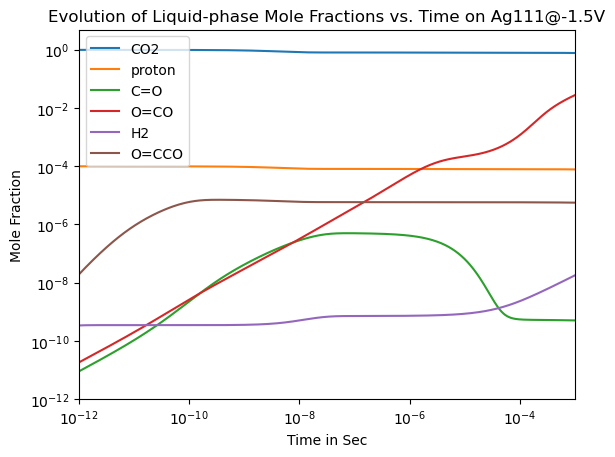

In [21]:
exclude_species = ["H2O"]
plotX(ssys1.sims[1], 1e-10, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1e-3)
ylim(1e-12, 5)
title("Evolution of Liquid-phase Mole Fractions vs. Time on Ag111@-1.5V")
gcf()
savefig("Ag111@-1.5V_X.png")

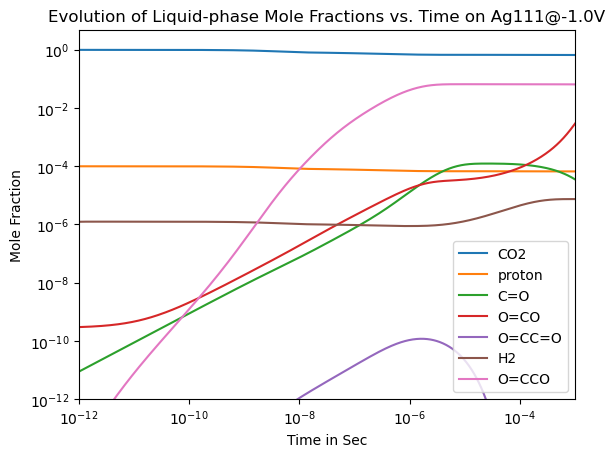

In [22]:
exclude_species = ["H2O"]
plotX(ssys2.sims[1], 1e-10, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1e-3)
ylim(1e-12, 5)
title("Evolution of Liquid-phase Mole Fractions vs. Time on Ag111@-1.0V")
gcf()
savefig("Ag111@-1.0V_X.png")

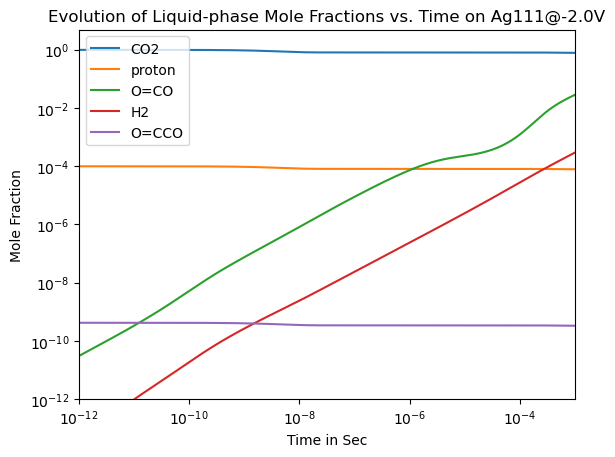

In [52]:
exclude_species = ["H2O"]
plotX(ssys3.sims[1], 1e-10, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1e-3)
ylim(1e-12, 5)
title("Evolution of Liquid-phase Mole Fractions vs. Time on Ag111@-2.0V")
gcf()

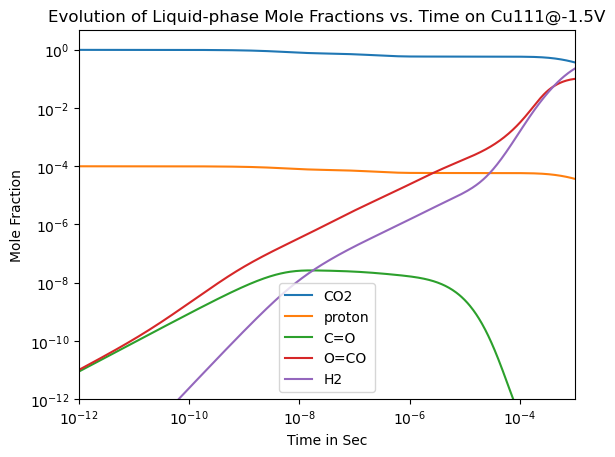

In [24]:
exclude_species = ["H2O"]
plotX(ssys4.sims[1], 1e-10, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1e-3)
ylim(1e-12, 5)
title("Evolution of Liquid-phase Mole Fractions vs. Time on Cu111@-1.5V")
gcf()
savefig("Cu111@-1.5V_X.png")

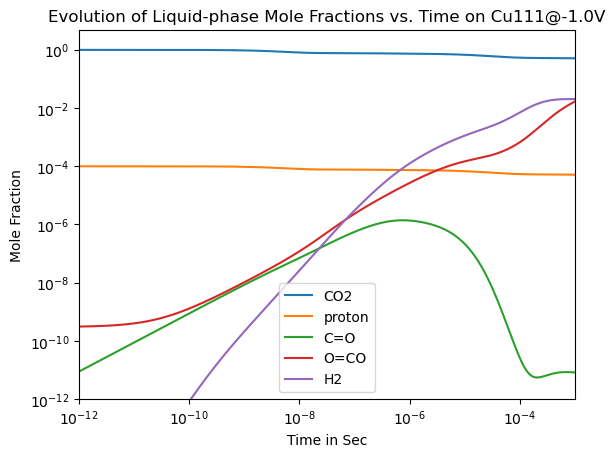

In [25]:
exclude_species = ["H2O"]
plotX(ssys5.sims[1], 1e-10, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1e-3)
ylim(1e-12, 5)
title("Evolution of Liquid-phase Mole Fractions vs. Time on Cu111@-1.0V")
gcf()
savefig("Cu111@-1.0V_X.png")

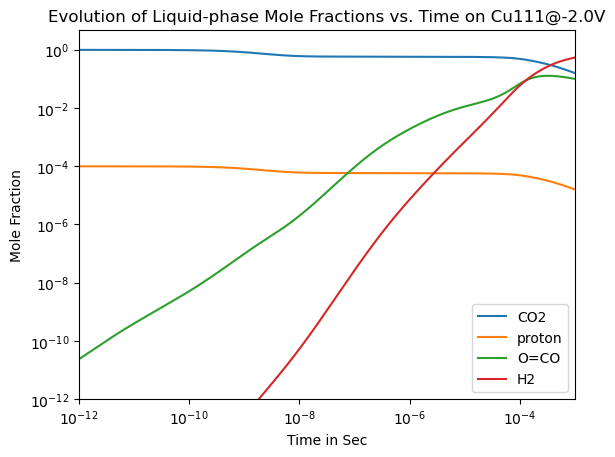

In [26]:
exclude_species = ["H2O"]
plotX(ssys6.sims[1], 1e-10, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1e-3)
ylim(1e-12, 5)
title("Evolution of Liquid-phase Mole Fractions vs. Time on Cu111@-2.0V")
gcf()
savefig("Cu111@-2.0V_X.png")

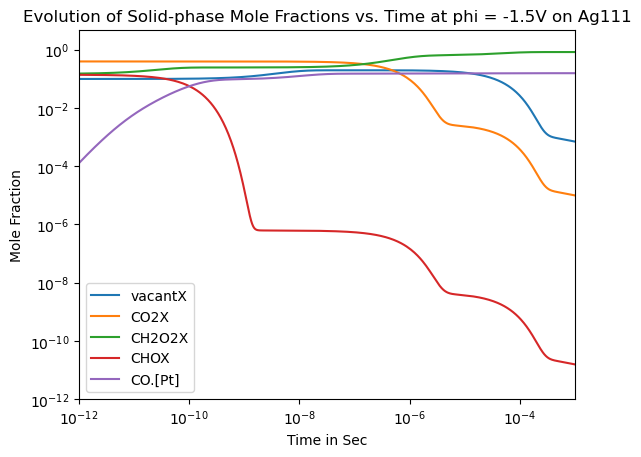

In [39]:
exclude_species = ["H2O"]
plotX(ssys1.sims[2], 0.1, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1e-3)
ylim(1e-12, 5)
title("Evolution of Solid-phase Mole Fractions vs. Time at phi = -1.5V on Ag111")
gcf()

In [28]:
Dict([ssys1.sims[1].names[i]=>molefractions(ssys1.sims[1],1)[i] for i in 1:length(ssys1.sims[1].names)])

Dict{String, Float64} with 17 entries:
  "O=CC=O" => 3.45195e-29
  "proton" => 2.7869e-5
  "O=CO"   => 0.646064
  "Ne"     => 0.0
  "COC=O"  => 1.65033e-15
  "[O]C=O" => 2.21456e-42
  "C=O"    => 1.78999e-10
  "[CH]=O" => 2.77632e-32
  "CO2"    => 0.27869
  "O=[C]O" => 4.57005e-35
  "N2"     => 0.0
  "O=CCO"  => 2.01265e-6
  "Ar"     => 0.0
  "H2O"    => 0.07521
  "He"     => 0.0
  "H"      => 5.33777e-37
  "H2"     => 6.18657e-6

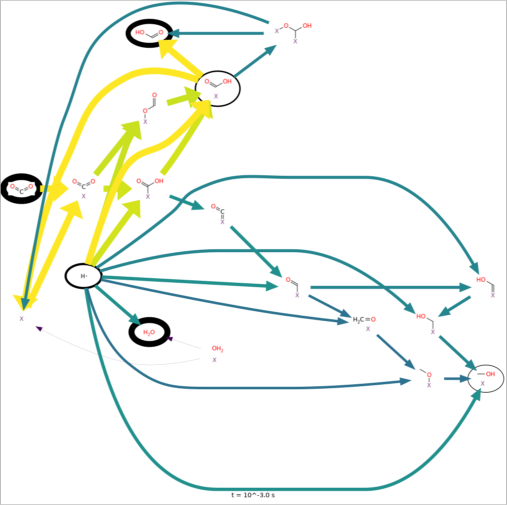

In [45]:
fd1 = getfluxdiagram(ssys1,1e-3;speciesratetolerance=1e-4)

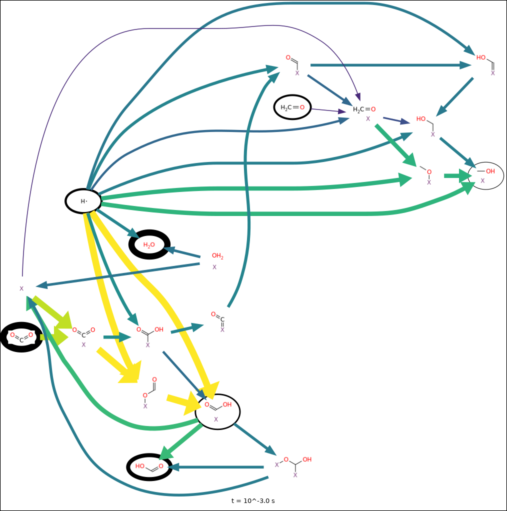

In [44]:
fd2 = getfluxdiagram(ssys2,1e-3;speciesratetolerance=1e-4)

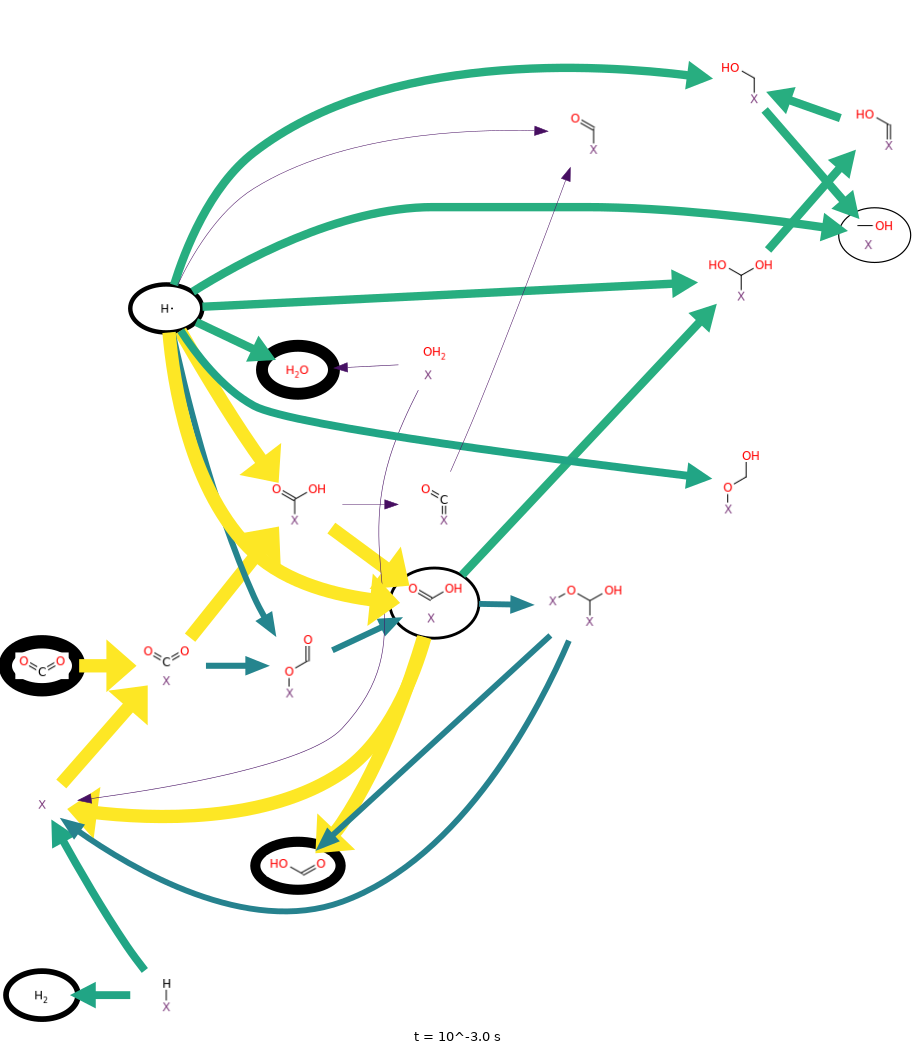

In [47]:
fd3 = getfluxdiagram(ssys3,1e-3;speciesratetolerance=1e-4)

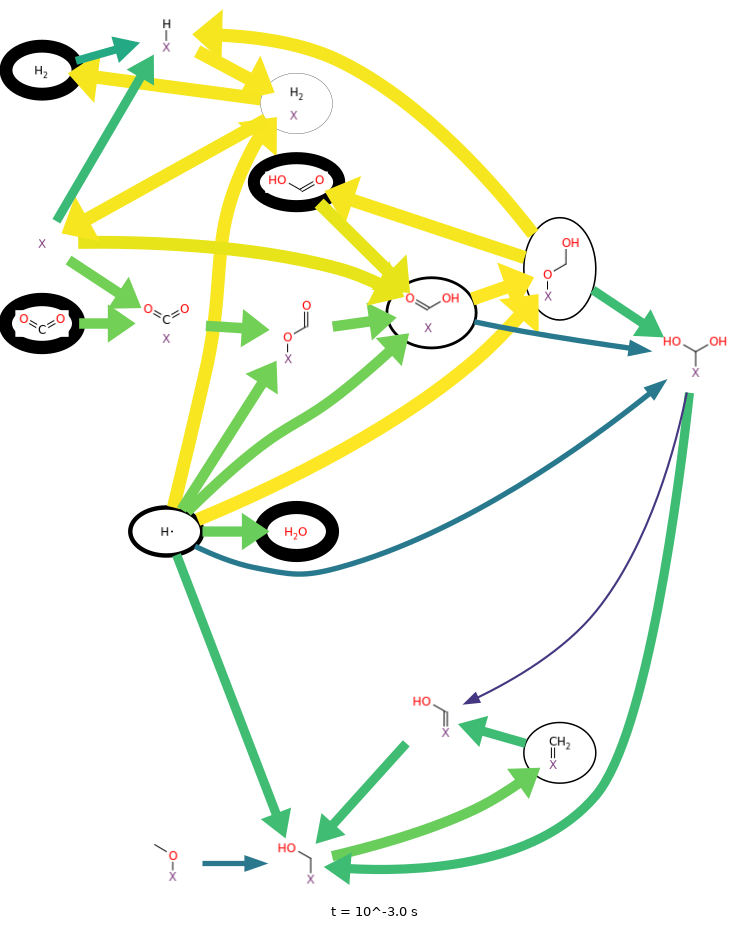

In [46]:
fd4 = getfluxdiagram(ssys4,1e-3;speciesratetolerance=1e-4)

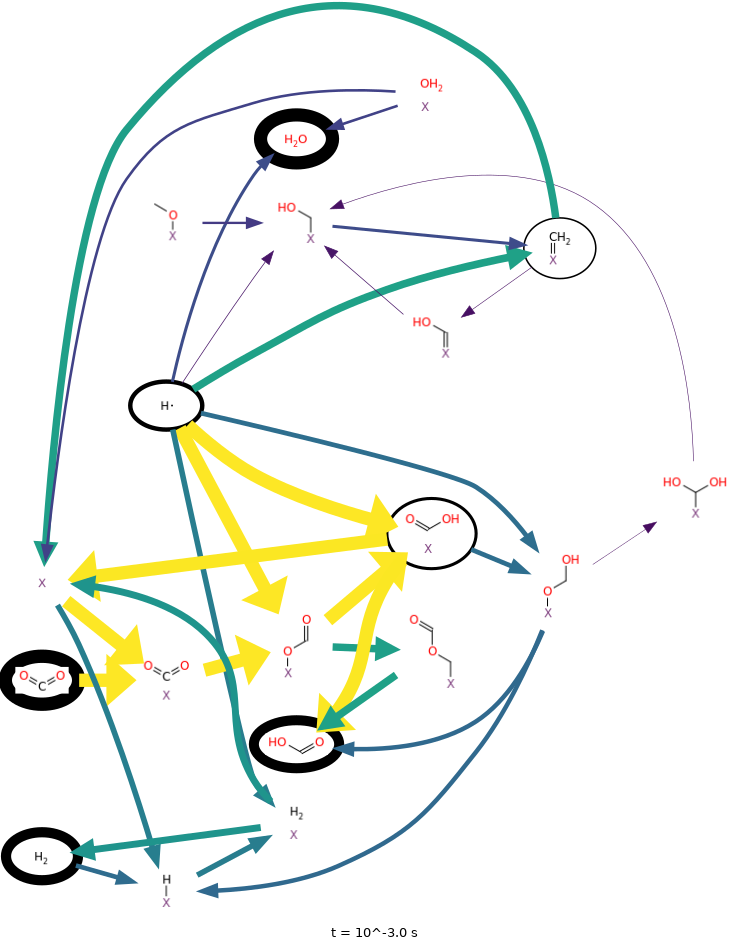

In [48]:
fd5 = getfluxdiagram(ssys5,1e-3;speciesratetolerance=1e-4)

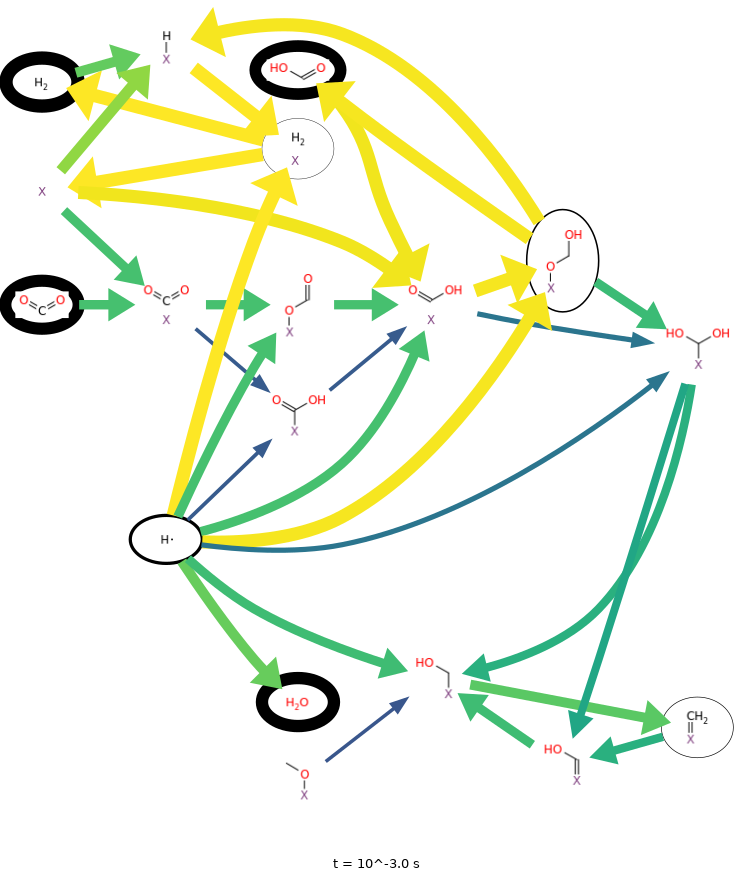

In [49]:
fd6 = getfluxdiagram(ssys6,1e-3;speciesratetolerance=1e-4)

In [32]:
# function plot_composition_comparison(solutions, t, tol, exclude, x_labels)
#     # Prepare data storage
#     species_dict = Dict{String, Vector{Float64}}()  # To collect mole fractions for each species

#     # Iterate through each solution
#     for (idx, bsol) in enumerate(solutions)
#         # Get mole fractions and species at the specified time
#         mole_fractions = molefractions(bsol, t)
#         species = bsol.domain.phase.species

#         # Filter species based on threshold and exclusion list
#         for (i, mf) in enumerate(mole_fractions)
#             species_name = species[i].name
#             if mf > tol && !(species_name in exclude)
#                 # Initialize vector for each species if not already present
#                 if !haskey(species_dict, species_name)
#                     species_dict[species_name] = zeros(length(solutions))
#                 end
#                 # Assign the mole fraction for the current solution
#                 species_dict[species_name][idx] = mf
#             end
#         end
#     end

#     # Convert species data to arrays for plotting
#     species_names = collect(keys(species_dict))
#     num_solutions = length(solutions)

#     # Sort species for each solution based on mole fractions (descending order)
#     sorted_species = sort(species_names, by=name -> -maximum(species_dict[name]))

#     # Plotting each solution individually
#     clf()  # Clear the current figure
#     bar_positions = 1:num_solutions
#     width = 0.35  # Width of each bar
#     color_cycle = get_cmap("tab20", length(sorted_species))

#     # Initialize bottom values for stacked bars
#     bottoms = zeros(num_solutions)

#     # Plot each species, stacking from the highest mole fraction down
#     for (color_idx, species_name) in enumerate(sorted_species)
#         # Get the mole fractions for the current species across solutions
#         current_data = species_dict[species_name]

#         # Plot bars for the current species
#         bar(bar_positions, current_data, width, bottom=bottoms, color=color_cycle(color_idx), label=species_name)

#         # Update the bottom values for stacking
#         bottoms .+= current_data
#     end

#     # Formatting the plot
#     xticks(bar_positions, x_labels)
#     ylabel("Mole Fraction")
#     legend(title="Species", loc="upper right", bbox_to_anchor=(1.2, 1))
#     title("Liquid Phase Composition at t = $t")
#     tight_layout()  # Adjust layout for better appearance
# end


plot_composition_comparison (generic function with 1 method)

In [33]:
# sims_collection = [ssys1.sims[1], ssys2.sims[1], ssys3.sims[1]]
# x_labels = ["Ag111@-2.0V", "Ag111@-1.5V", "Ag111@-1.0V"]
# plot_composition_comparison(sims_collection, 1e-3, 1e-3, ["H2O"])

MethodError: MethodError: no method matching plot_composition_comparison(::Vector{Simulation{ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Nothing, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.FullSpecialize, ReactionMechanismSimulator.var"#dydt#616"{Tuple{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactiveInternalInterfaceConstantTPhi{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Matrix{Int64}, Vector{Float64}, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ElementaryReaction{T, Int64, V1, V2, V3, V4, Vector{Vector{String}}, Vector{Any}, Vector{Any}, Vector{Any}, Vector{Any}} where {T<:AbstractRate, V1<:AbstractArray, V2<:AbstractArray, V3<:AbstractArray, V4<:AbstractArray}}}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacy!#617"{Tuple{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactiveInternalInterfaceConstantTPhi{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Matrix{Int64}, Vector{Float64}, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ElementaryReaction{T, Int64, V1, V2, V3, V4, Vector{Vector{String}}, Vector{Any}, Vector{Any}, Vector{Any}, Vector{Any}} where {T<:AbstractRate, V1<:AbstractArray, V2<:AbstractArray, V3<:AbstractArray, V4<:AbstractArray}}}}, Nothing, Nothing, SparseArrays.SparseMatrixCSC{Float64, Int64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Nothing, Nothing, Nothing, ReactionMechanismSimulator.var"#jacp!#618"{Tuple{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactiveInternalInterfaceConstantTPhi{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Matrix{Int64}, Vector{Float64}, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ElementaryReaction{T, Int64, V1, V2, V3, V4, Vector{Vector{String}}, Vector{Any}, Vector{Any}, Vector{Any}, Vector{Any}} where {T<:AbstractRate, V1<:AbstractArray, V2<:AbstractArray, V3<:AbstractArray, V4<:AbstractArray}}}}, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Sundials.CVODE_BDF{:Newton, :Dense, Nothing, Nothing}, SciMLBase.HermiteInterpolation{Vector{Float64}, Vector{Vector{Float64}}, Vector{Vector{Float64}}}, DiffEqBase.Stats, Nothing}, ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Vector{ReactiveInternalInterfaceConstantTPhi{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Matrix{Int64}, Vector{Float64}, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ElementaryReaction{T, Int64, V1, V2, V3, V4, Vector{Vector{String}}, Vector{Any}, Vector{Any}, Vector{Any}, Vector{Any}} where {T<:AbstractRate, V1<:AbstractArray, V2<:AbstractArray, V3<:AbstractArray, V4<:AbstractArray}}}, Vector{String}, ReactionMechanismSimulator.var"#F#675"{ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Nothing, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.FullSpecialize, ReactionMechanismSimulator.var"#dydt#616"{Tuple{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactiveInternalInterfaceConstantTPhi{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Matrix{Int64}, Vector{Float64}, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ElementaryReaction{T, Int64, V1, V2, V3, V4, Vector{Vector{String}}, Vector{Any}, Vector{Any}, Vector{Any}, Vector{Any}} where {T<:AbstractRate, V1<:AbstractArray, V2<:AbstractArray, V3<:AbstractArray, V4<:AbstractArray}}}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, ReactionMechanismSimulator.var"#jacy!#617"{Tuple{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactiveInternalInterfaceConstantTPhi{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Matrix{Int64}, Vector{Float64}, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ElementaryReaction{T, Int64, V1, V2, V3, V4, Vector{Vector{String}}, Vector{Any}, Vector{Any}, Vector{Any}, Vector{Any}} where {T<:AbstractRate, V1<:AbstractArray, V2<:AbstractArray, V3<:AbstractArray, V4<:AbstractArray}}}}, Nothing, Nothing, SparseArrays.SparseMatrixCSC{Float64, Int64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Nothing, Nothing, Nothing, ReactionMechanismSimulator.var"#jacp!#618"{Tuple{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}}, Vector{ReactiveInternalInterfaceConstantTPhi{ConstantTVDomain{IdealDiluteSolution{Tuple{}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, ConstantTAPhiDomain{IdealSurface{Tuple{Arrheniusvec{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ReactionMechanismSimulator.NASAvec{EmptyThermoUncertainty}, Vector{Float64}}, Int64, Float64, Float64, Integer, Vector{Int64}}, Matrix{Int64}, Vector{Float64}, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Float64}, ElementaryReaction{T, Int64, V1, V2, V3, V4, Vector{Vector{String}}, Vector{Any}, Vector{Any}, Vector{Any}, Vector{Any}} where {T<:AbstractRate, V1<:AbstractArray, V2<:AbstractArray, V3<:AbstractArray, V4<:AbstractArray}}}}, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Sundials.CVODE_BDF{:Newton, :Dense, Nothing, Nothing}, SciMLBase.HermiteInterpolation{Vector{Float64}, Vector{Vector{Float64}}, Vector{Vector{Float64}}}, DiffEqBase.Stats, Nothing}, SciMLBase.HermiteInterpolation{Vector{Float64}, Matrix{Float64}, Matrix{Float64}}}, Matrix{Float64}, Vector{Species}, Vector{ElementaryReaction}, Vector{Float64}}}, ::Float64, ::Float64, ::Vector{String})

Closest candidates are:
  plot_composition_comparison(::Any, ::Any, ::Any, ::Any, !Matched::Any)
   @ Main ~/Work/Electrocat/CO2_RR_RMG/CO2_Reduction_Ag/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X26sdnNjb2RlLXJlbW90ZQ==.jl:1
